<a href="https://colab.research.google.com/github/Octopus-Echo/project/blob/main/%E4%BF%AF%E7%9E%B0%E8%A7%86%E8%A7%92%E8%BD%AC%E6%8D%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 读取视频

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cap = cv2.VideoCapture('video.mp4')

In [ ]:
if not cap.isOpened():
    print("无法打开视频文件")
else:
    print("成功打开视频文件")

成功打开视频文件


# 获取参数

In [ ]:
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)

In [ ]:
print(f"帧宽度: {frame_width}")
print(f"帧高度: {frame_height}")
print(f"帧率: {frame_rate}")

帧宽度: 960
帧高度: 540
帧率: 2.5


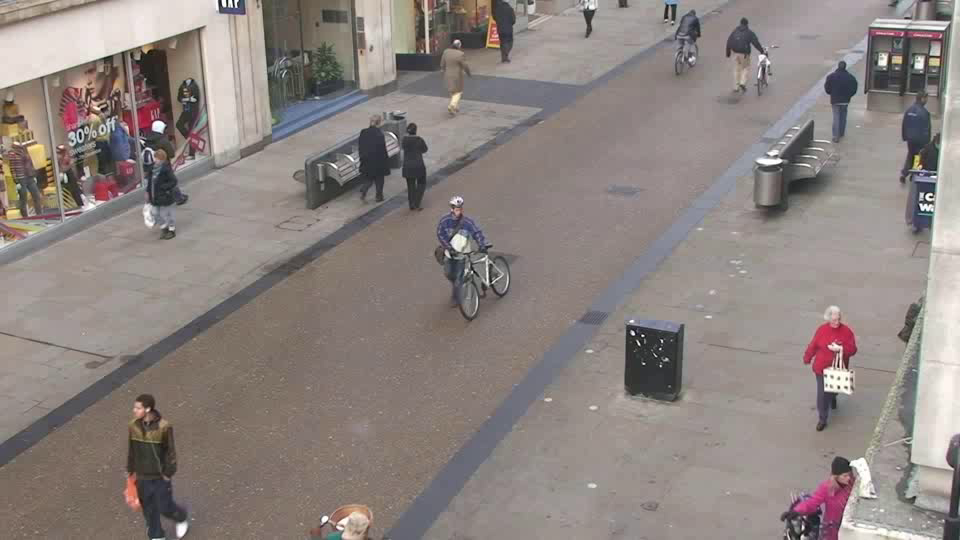

In [ ]:
ret, frame = cap.read()
if not ret:
    print("视频读取结束或出错")
else:
	cv2_imshow(frame)


# 定义编码器并创建保存对象

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out=cv2.VideoWriter('/content/out-put video.mp4', fourcc, 2.5, (960, 540))

# 寻找原始点

两侧道路平行的，第一步先沿着两侧边缘线找点，左侧很快确定任意两个，右侧有遮挡，左侧道路有一条黑色的横线区域，将它视为平行线，利用它平移到经过左侧上方点来确定右侧上方一个点，同样的方法确定左侧道路下方那个点经过的平行直线，大致估计一个与右侧上方确定点能够形成与马路形成平行直线的线。

In [ ]:
pts1=np.float32([[0, 280],[700, 450],[580, 0],[950, 60]])

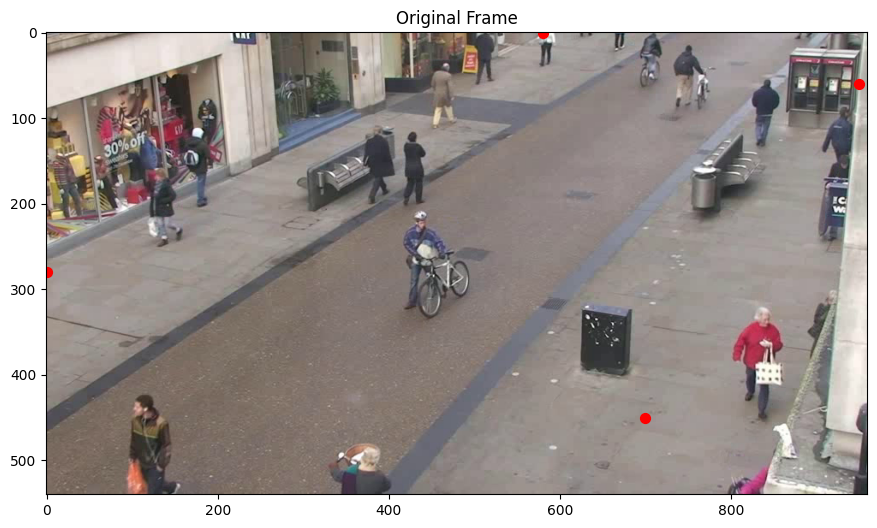

In [ ]:
ret, frame = cap.read()
if ret:
    #透视变换
    project_img = cv2.warpPerspective(frame, M, (frame_width, frame_height))
    #使用matplotlib 显示变换前后的图像及其对应点
    fig,axes= plt.subplots(1,1,figsize=(12, 6))
    #显示原始图像及其对应点
    axes.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
    axes.set_title('Original Frame')
    for point in pts1:
        axes.scatter(*point,color='red',s=50)
    plt.show()
else: # This line was likely misaligned
    print("无法读取视频的第一帧。")

# 透视转换

转换为鸟瞰图，建筑物看不见，于是将能看见的道路转换为一整张图，所以坐标点选择四个顶点

In [ ]:
pts2=np.float32([[0, 540],[960, 540],[0, 0],[960, 0]])

确定矩阵

In [ ]:
M=cv2.getPerspectiveTransform(pts1, pts2)
print(M)

[[ 1.78799319e+00  3.70370018e+00 -1.03703605e+03]
 [-3.98564463e-01  2.45781419e+00  2.31167388e+02]
 [-2.42036005e-04  2.50896403e-03  1.00000000e+00]]


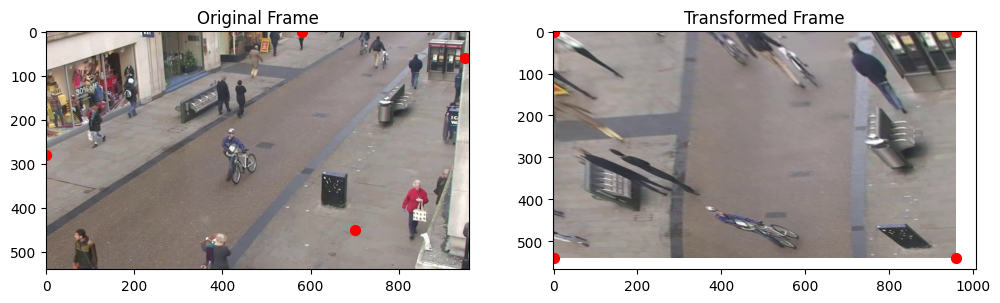

In [ ]:
ret, frame = cap.read()
if ret:
    #透视变换
    project_img = cv2.warpPerspective(frame, M, (frame_width, frame_height))
    #使用matplotlib 显示变换前后的图像及其对应点
    fig,axes= plt.subplots(1,2,figsize=(12, 6))
    #原始图像和选定的点
    axes[0].imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Frame')
    for point in pts1:
        axes[0].scatter(*point,color='red',s=50)
    #变换后的图像和对应点
    axes[1].imshow(cv2.cvtColor(project_img,cv2.COLOR_BGR2RGB))
    axes[1].set_title('Transformed Frame')
    for point in pts2:
        axes[1].scatter(*point,color='red',s=50)
    #显示图像
    plt.show()
else:
    print("无法读取视频的第一帧。")

# 转换为视频并保存

In [ ]:
while cap.isOpened():
    ret,frame=cap.read()
    if not ret:
        break
    #进行透视变换
    project_img = cv2.warpPerspective(frame,M,(960,540))
    #写入输出视频
    out.write(project_img)